In [1]:
!nvidia-smi

Tue Jun  3 19:50:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [3]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="l6Q72B53m8wMr58Efd17")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov11:: 100%|██████████| 6472/6472 [00:01<00:00, 5990.58it/s]


In [6]:
model_person = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 72.8MB/s]


In [7]:

image_path = "/content/PPE_Detection-2/valid/images/SikctinTwo2154_jpg.rf.68ff99a6e642ce535e4d003074ac408c.jpg"

results_person = model_person(image_path)

results_person[0].show()



image 1/1 /content/PPE_Detection-2/valid/images/SikctinTwo2154_jpg.rf.68ff99a6e642ce535e4d003074ac408c.jpg: 640x640 3 persons, 10.6ms
Speed: 3.1ms preprocess, 10.6ms inference, 332.8ms postprocess per image at shape (1, 3, 640, 640)


In [8]:
for r in results_person:
    for box in r.boxes:
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        print(f"Classe: {cls}, Confidenza: {conf}")


Classe: 0, Confidenza: 0.6004921197891235
Classe: 0, Confidenza: 0.418244332075119
Classe: 0, Confidenza: 0.3590177595615387


In [9]:
dataset.location

'/content/PPE_Detection-2'

Training Yolo11

In [10]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model=yolo11n.pt epochs=40 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 68.0MB/s]
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PPE_Detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

In [11]:
model_ppe = YOLO("runs/detect/train/weights/best.pt")


In [12]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

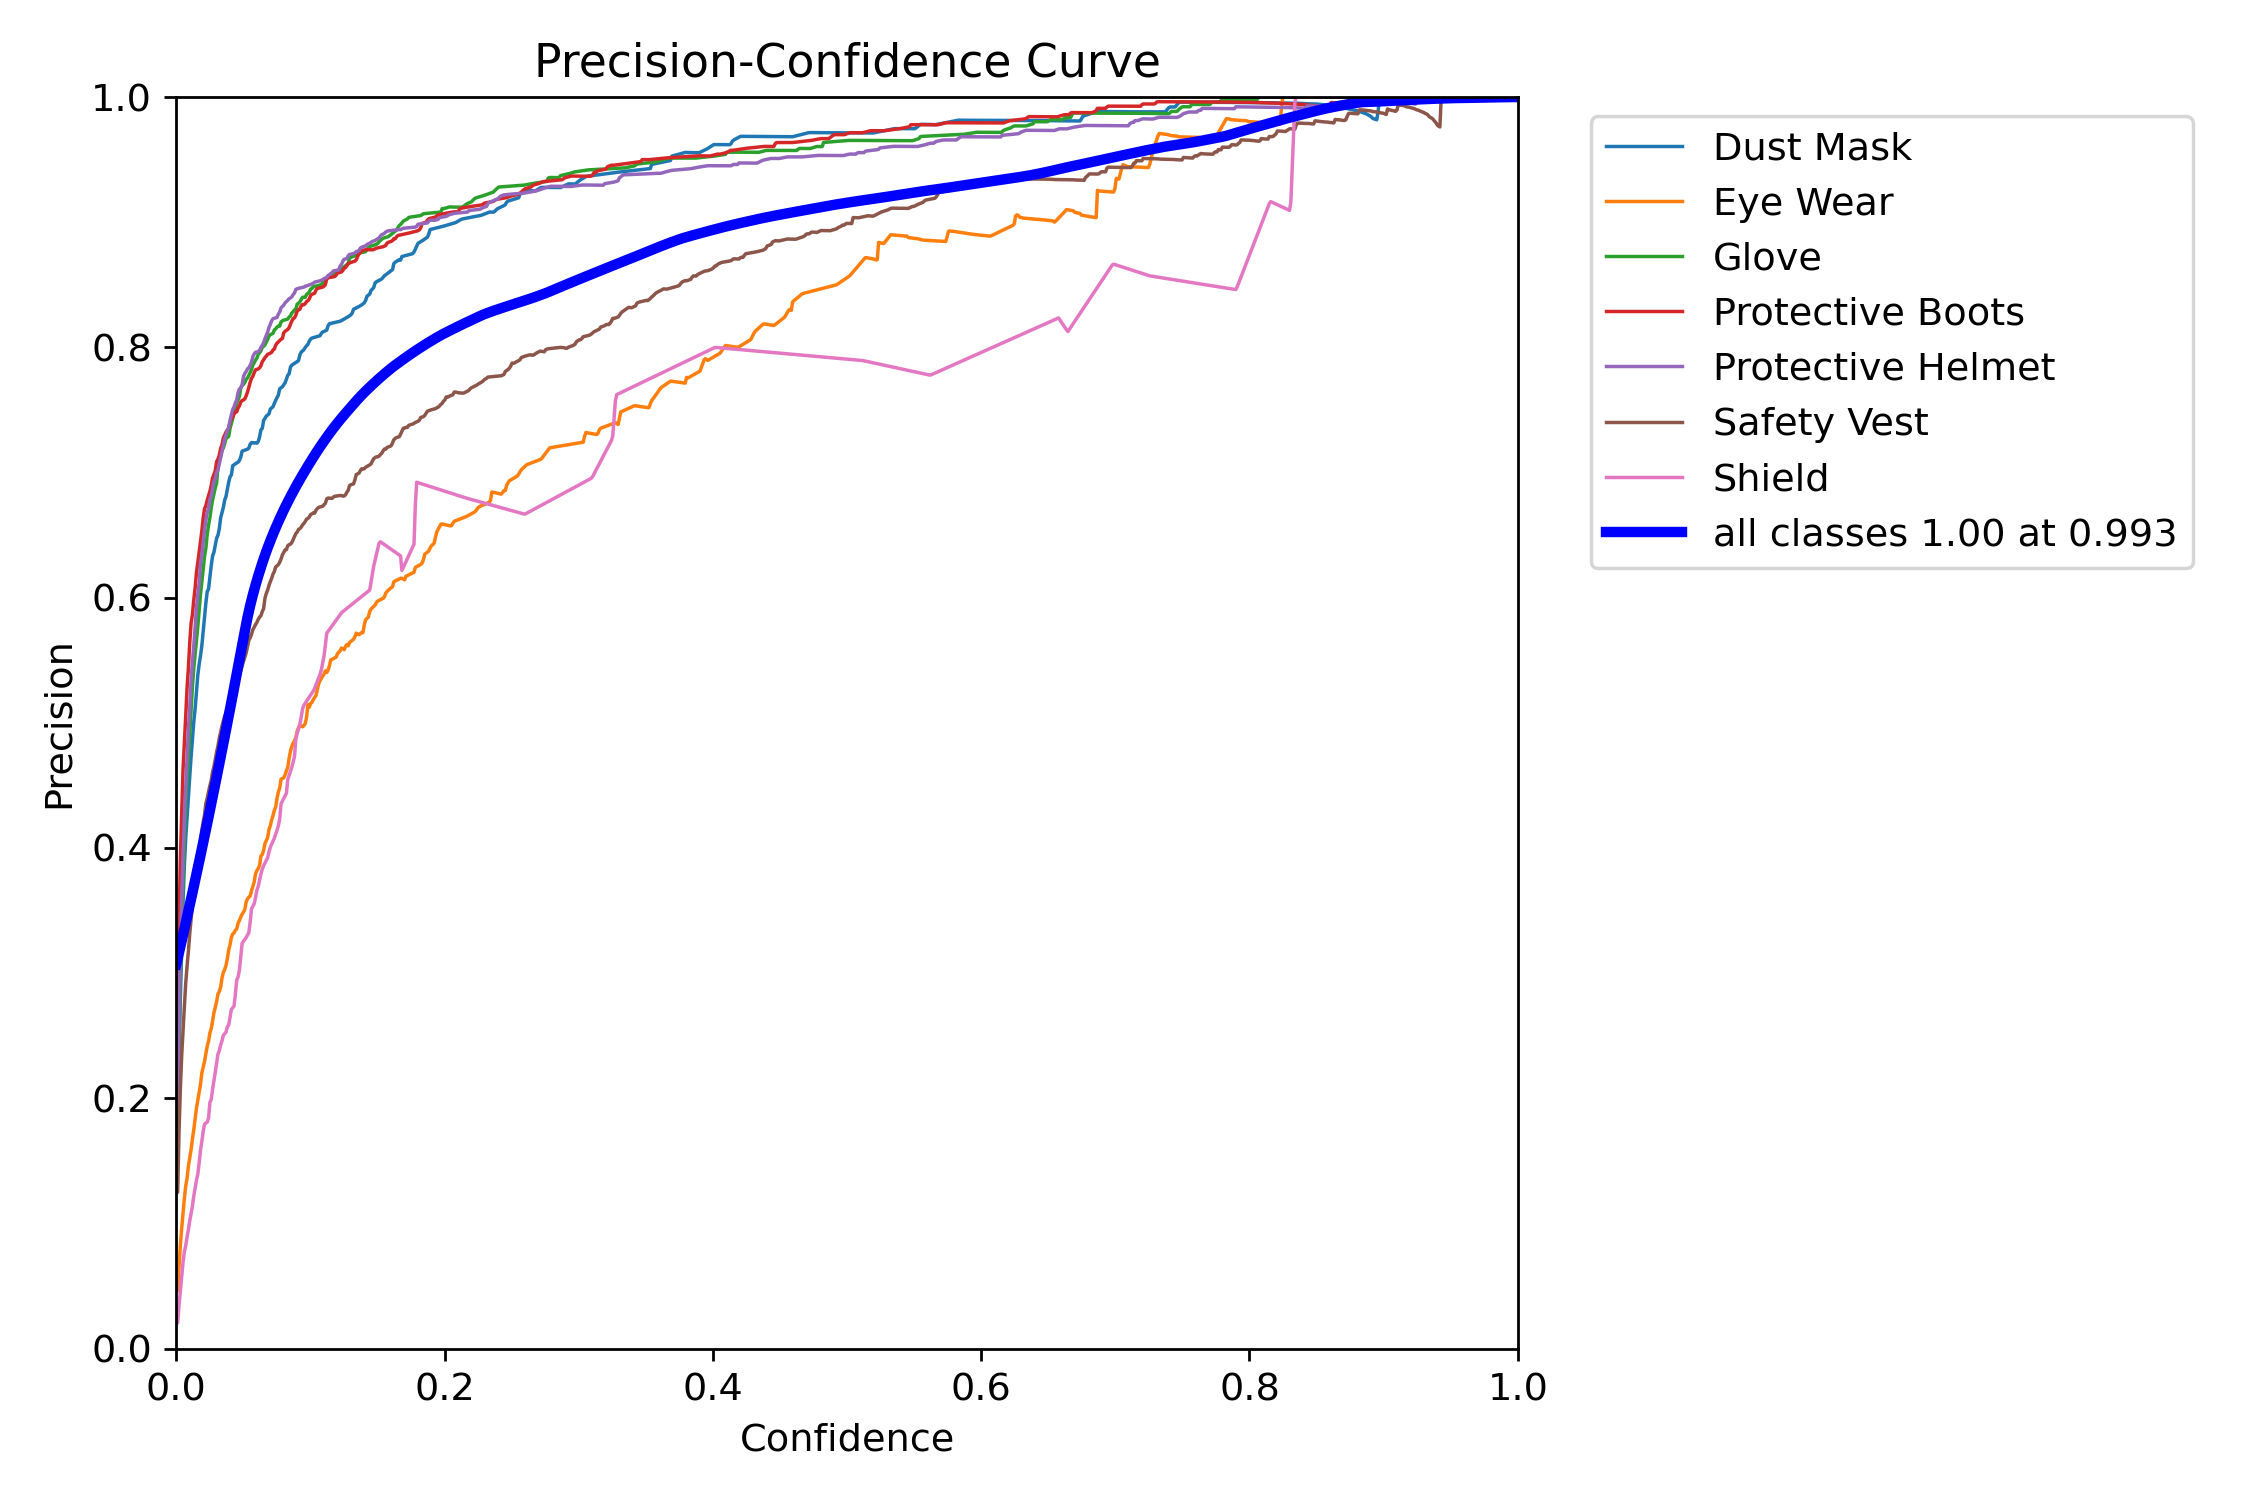

In [13]:
from IPython.display import Image # Importing the 'Image' class

Image("/content/runs/detect/train/P_curve.png", width=600)

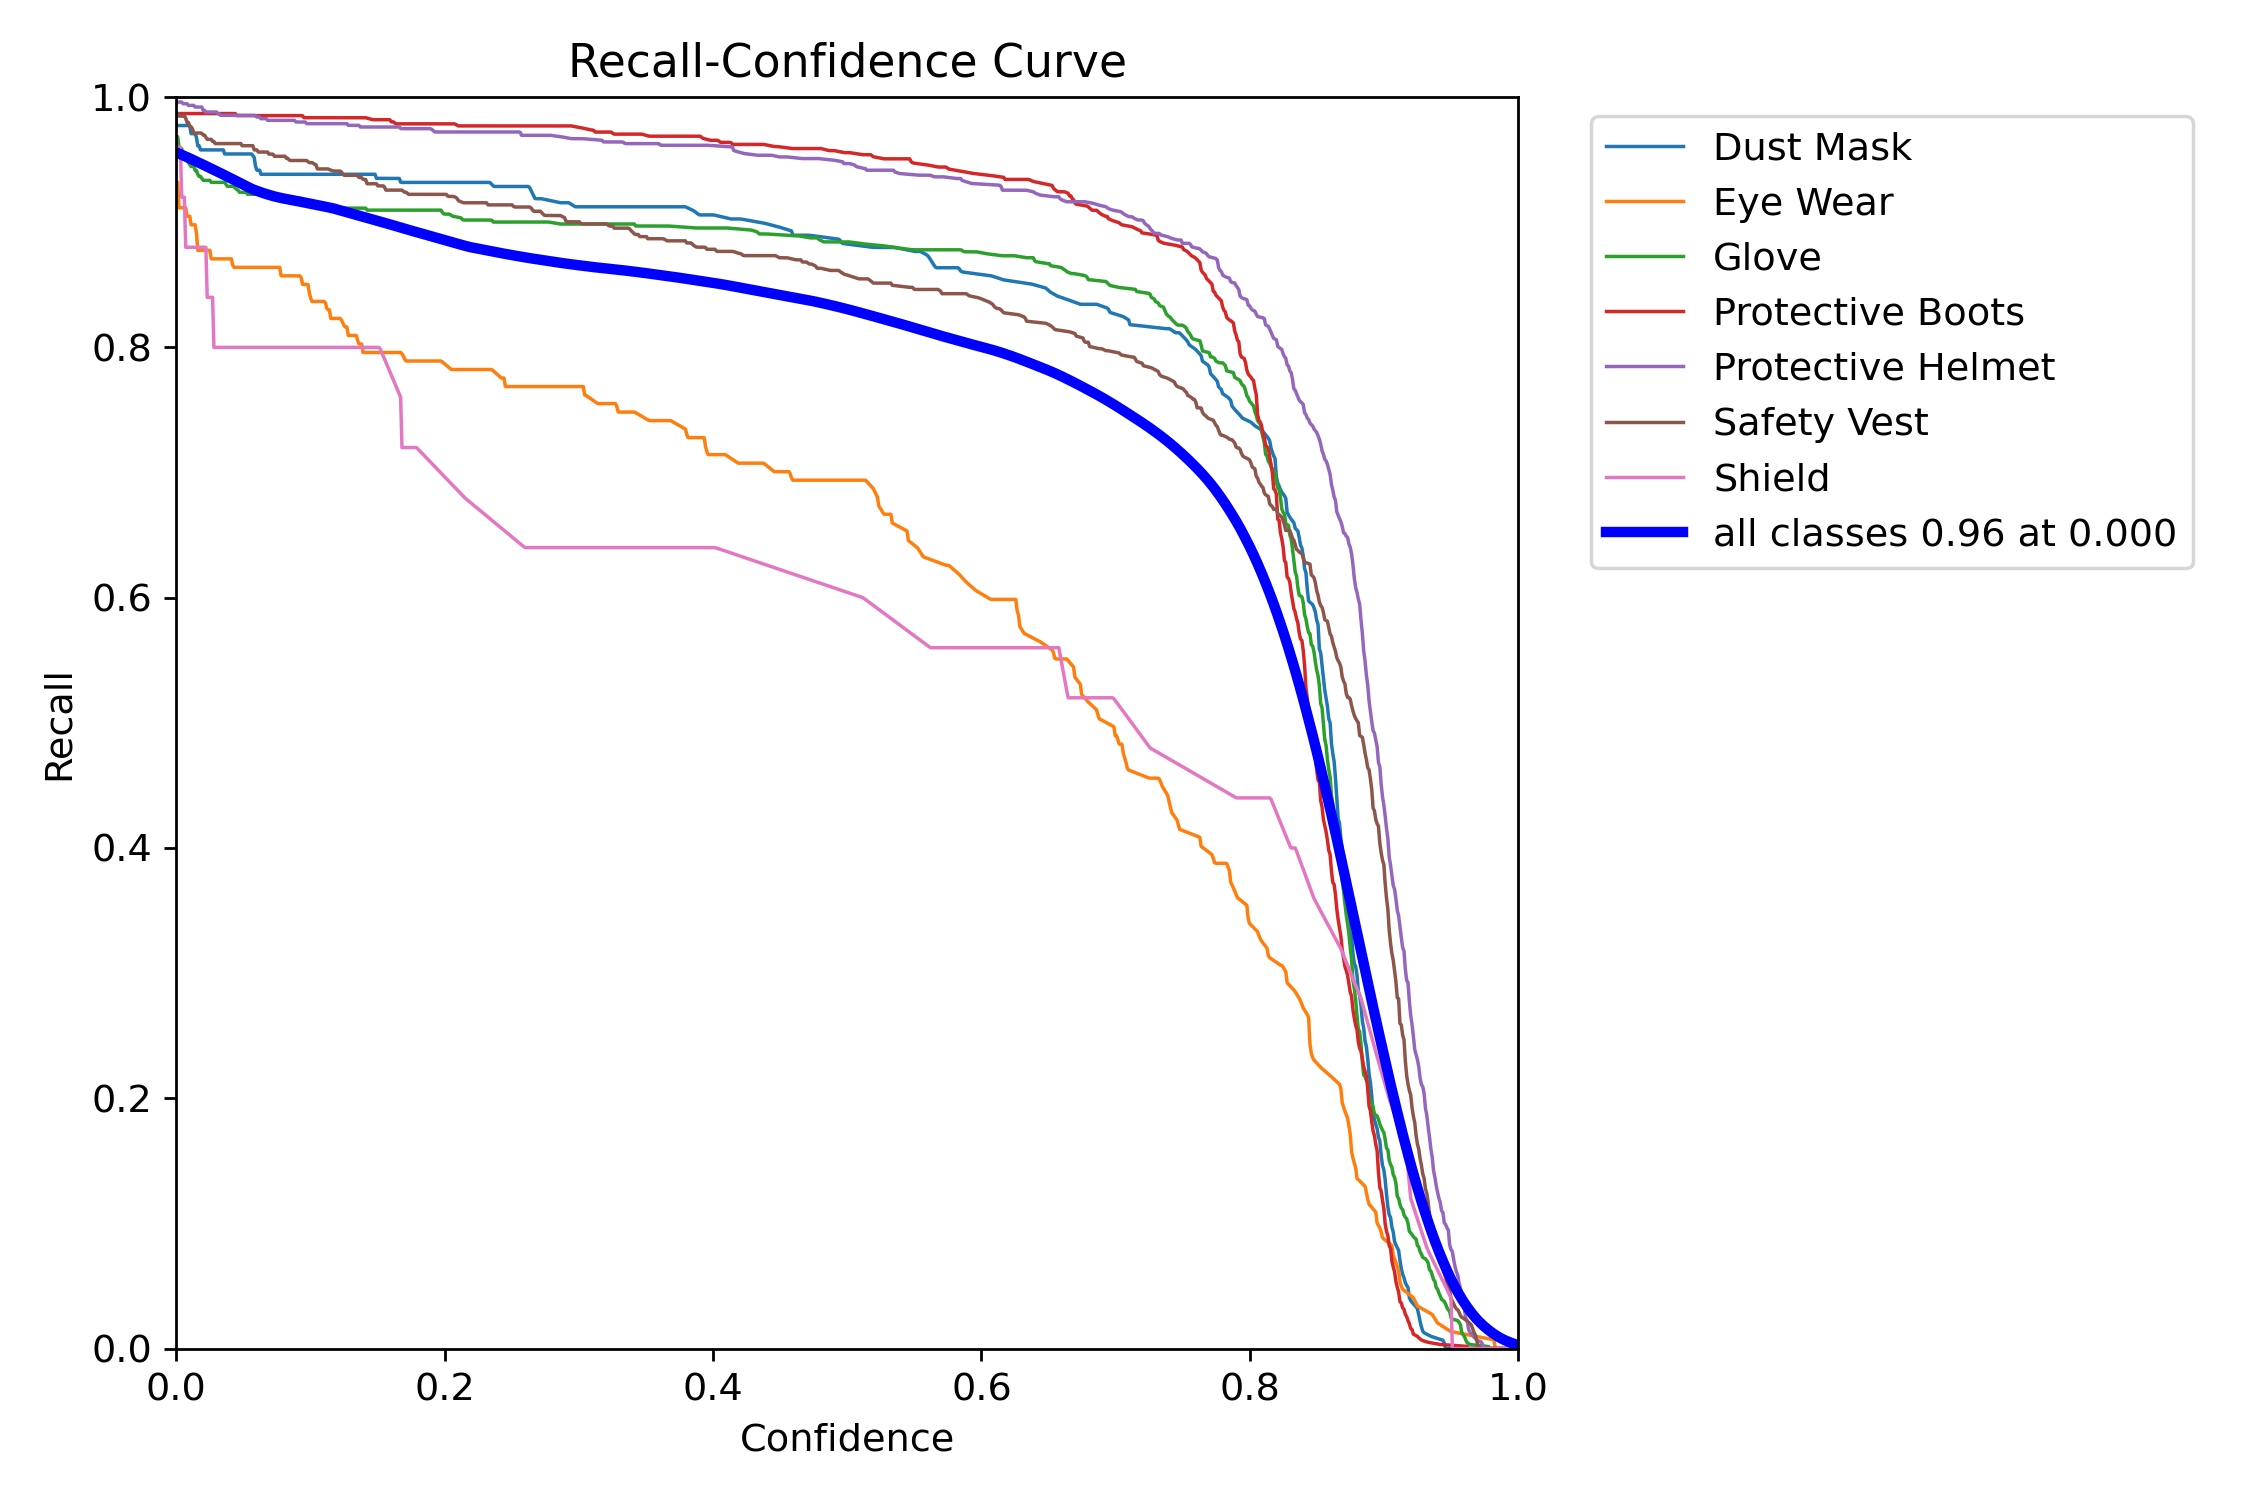

In [14]:
Image("/content/runs/detect/train/R_curve.png", width=600)

In [15]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

In [16]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

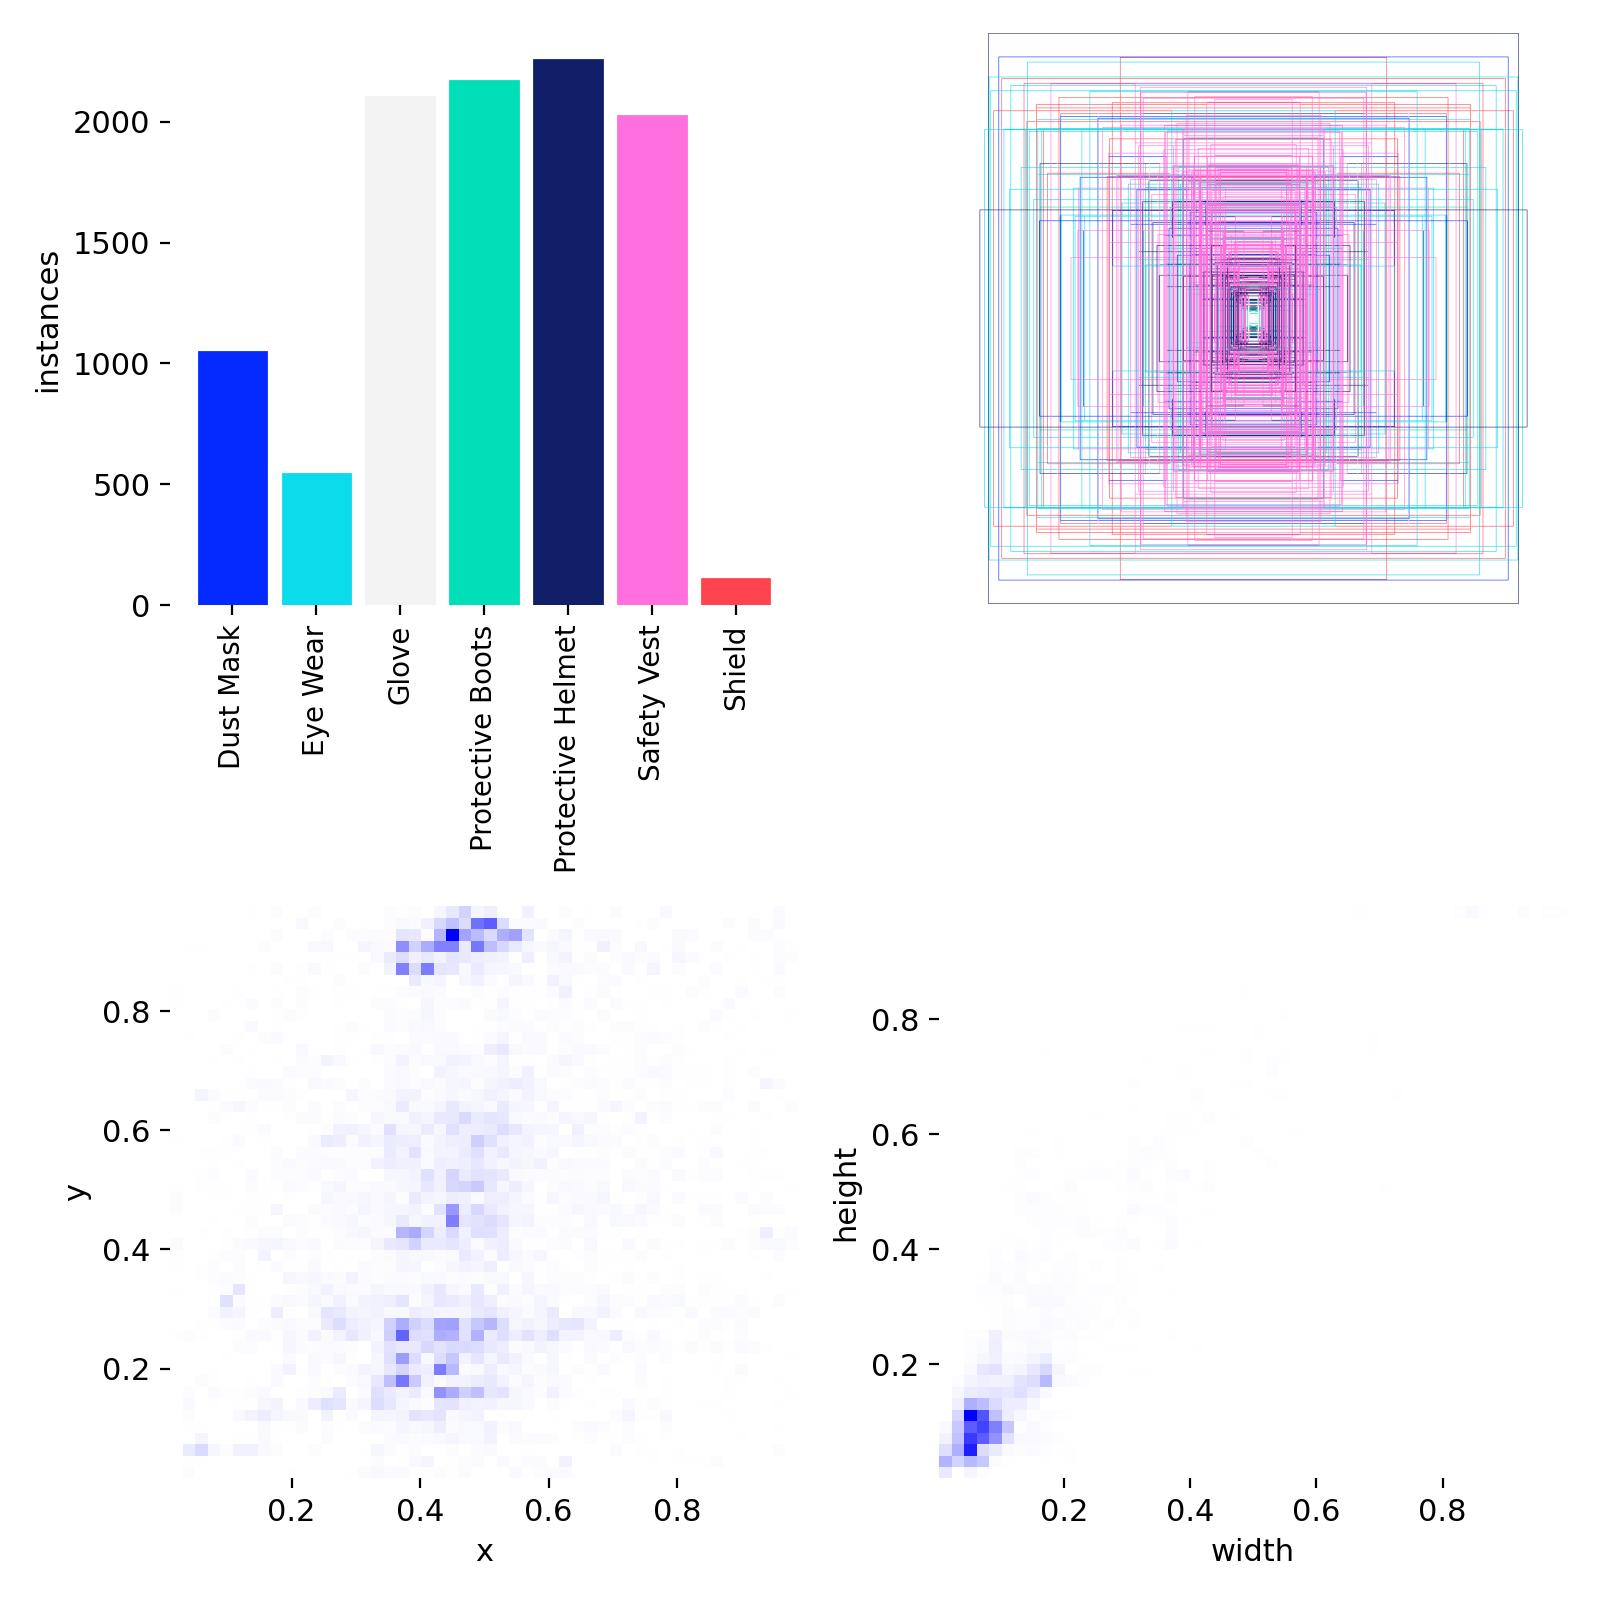

In [17]:
Image("/content/runs/detect/train/labels.jpg", width=600)

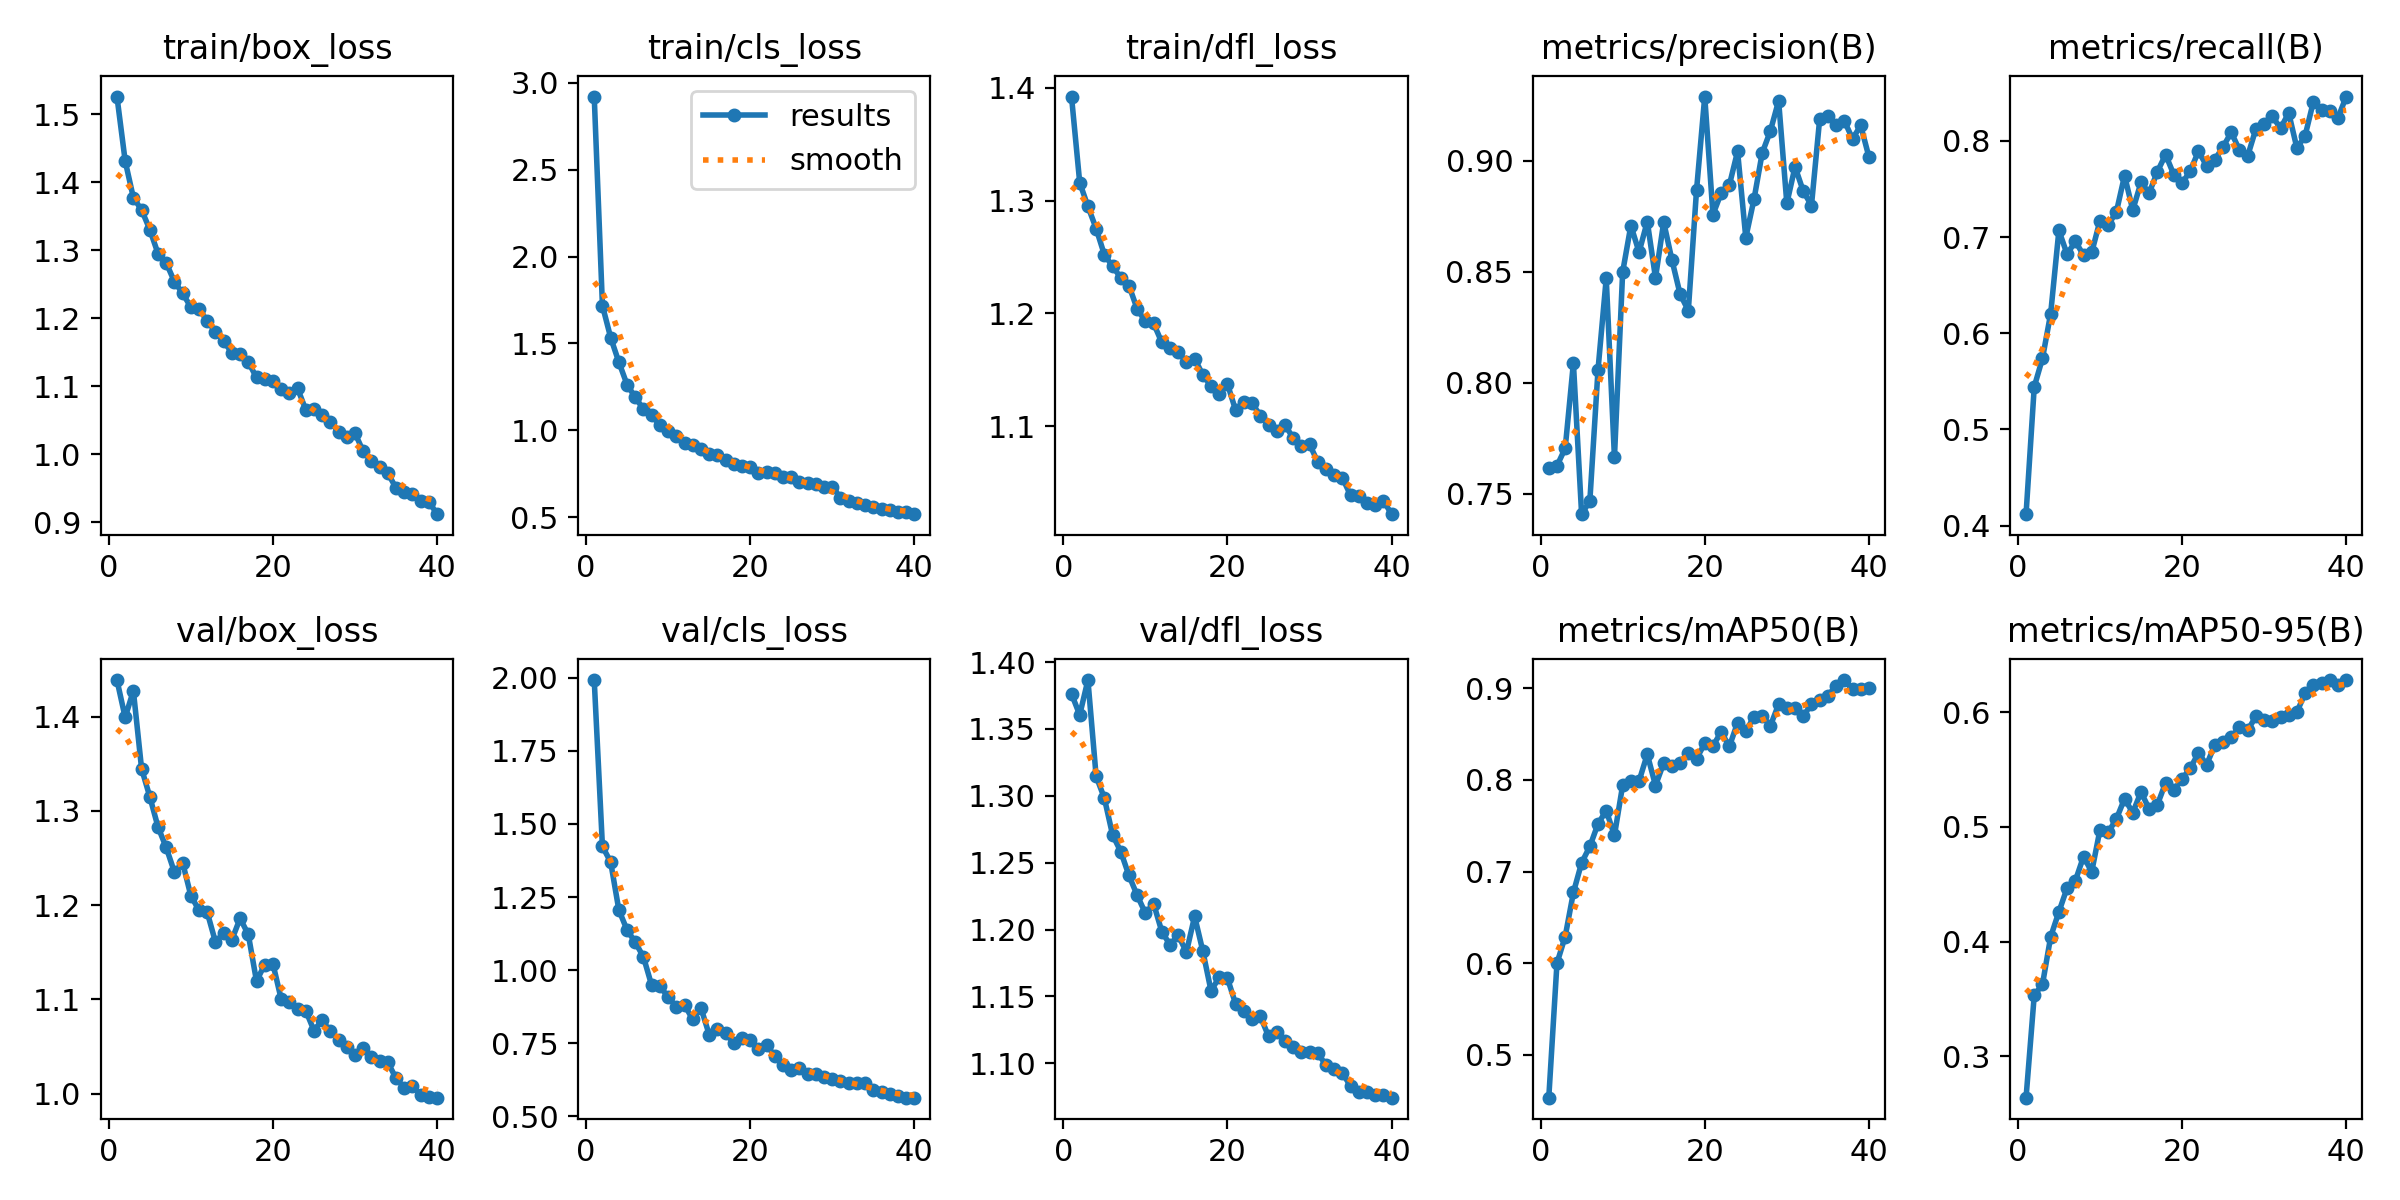

In [18]:
Image("/content/runs/detect/train/results.png", width=600)

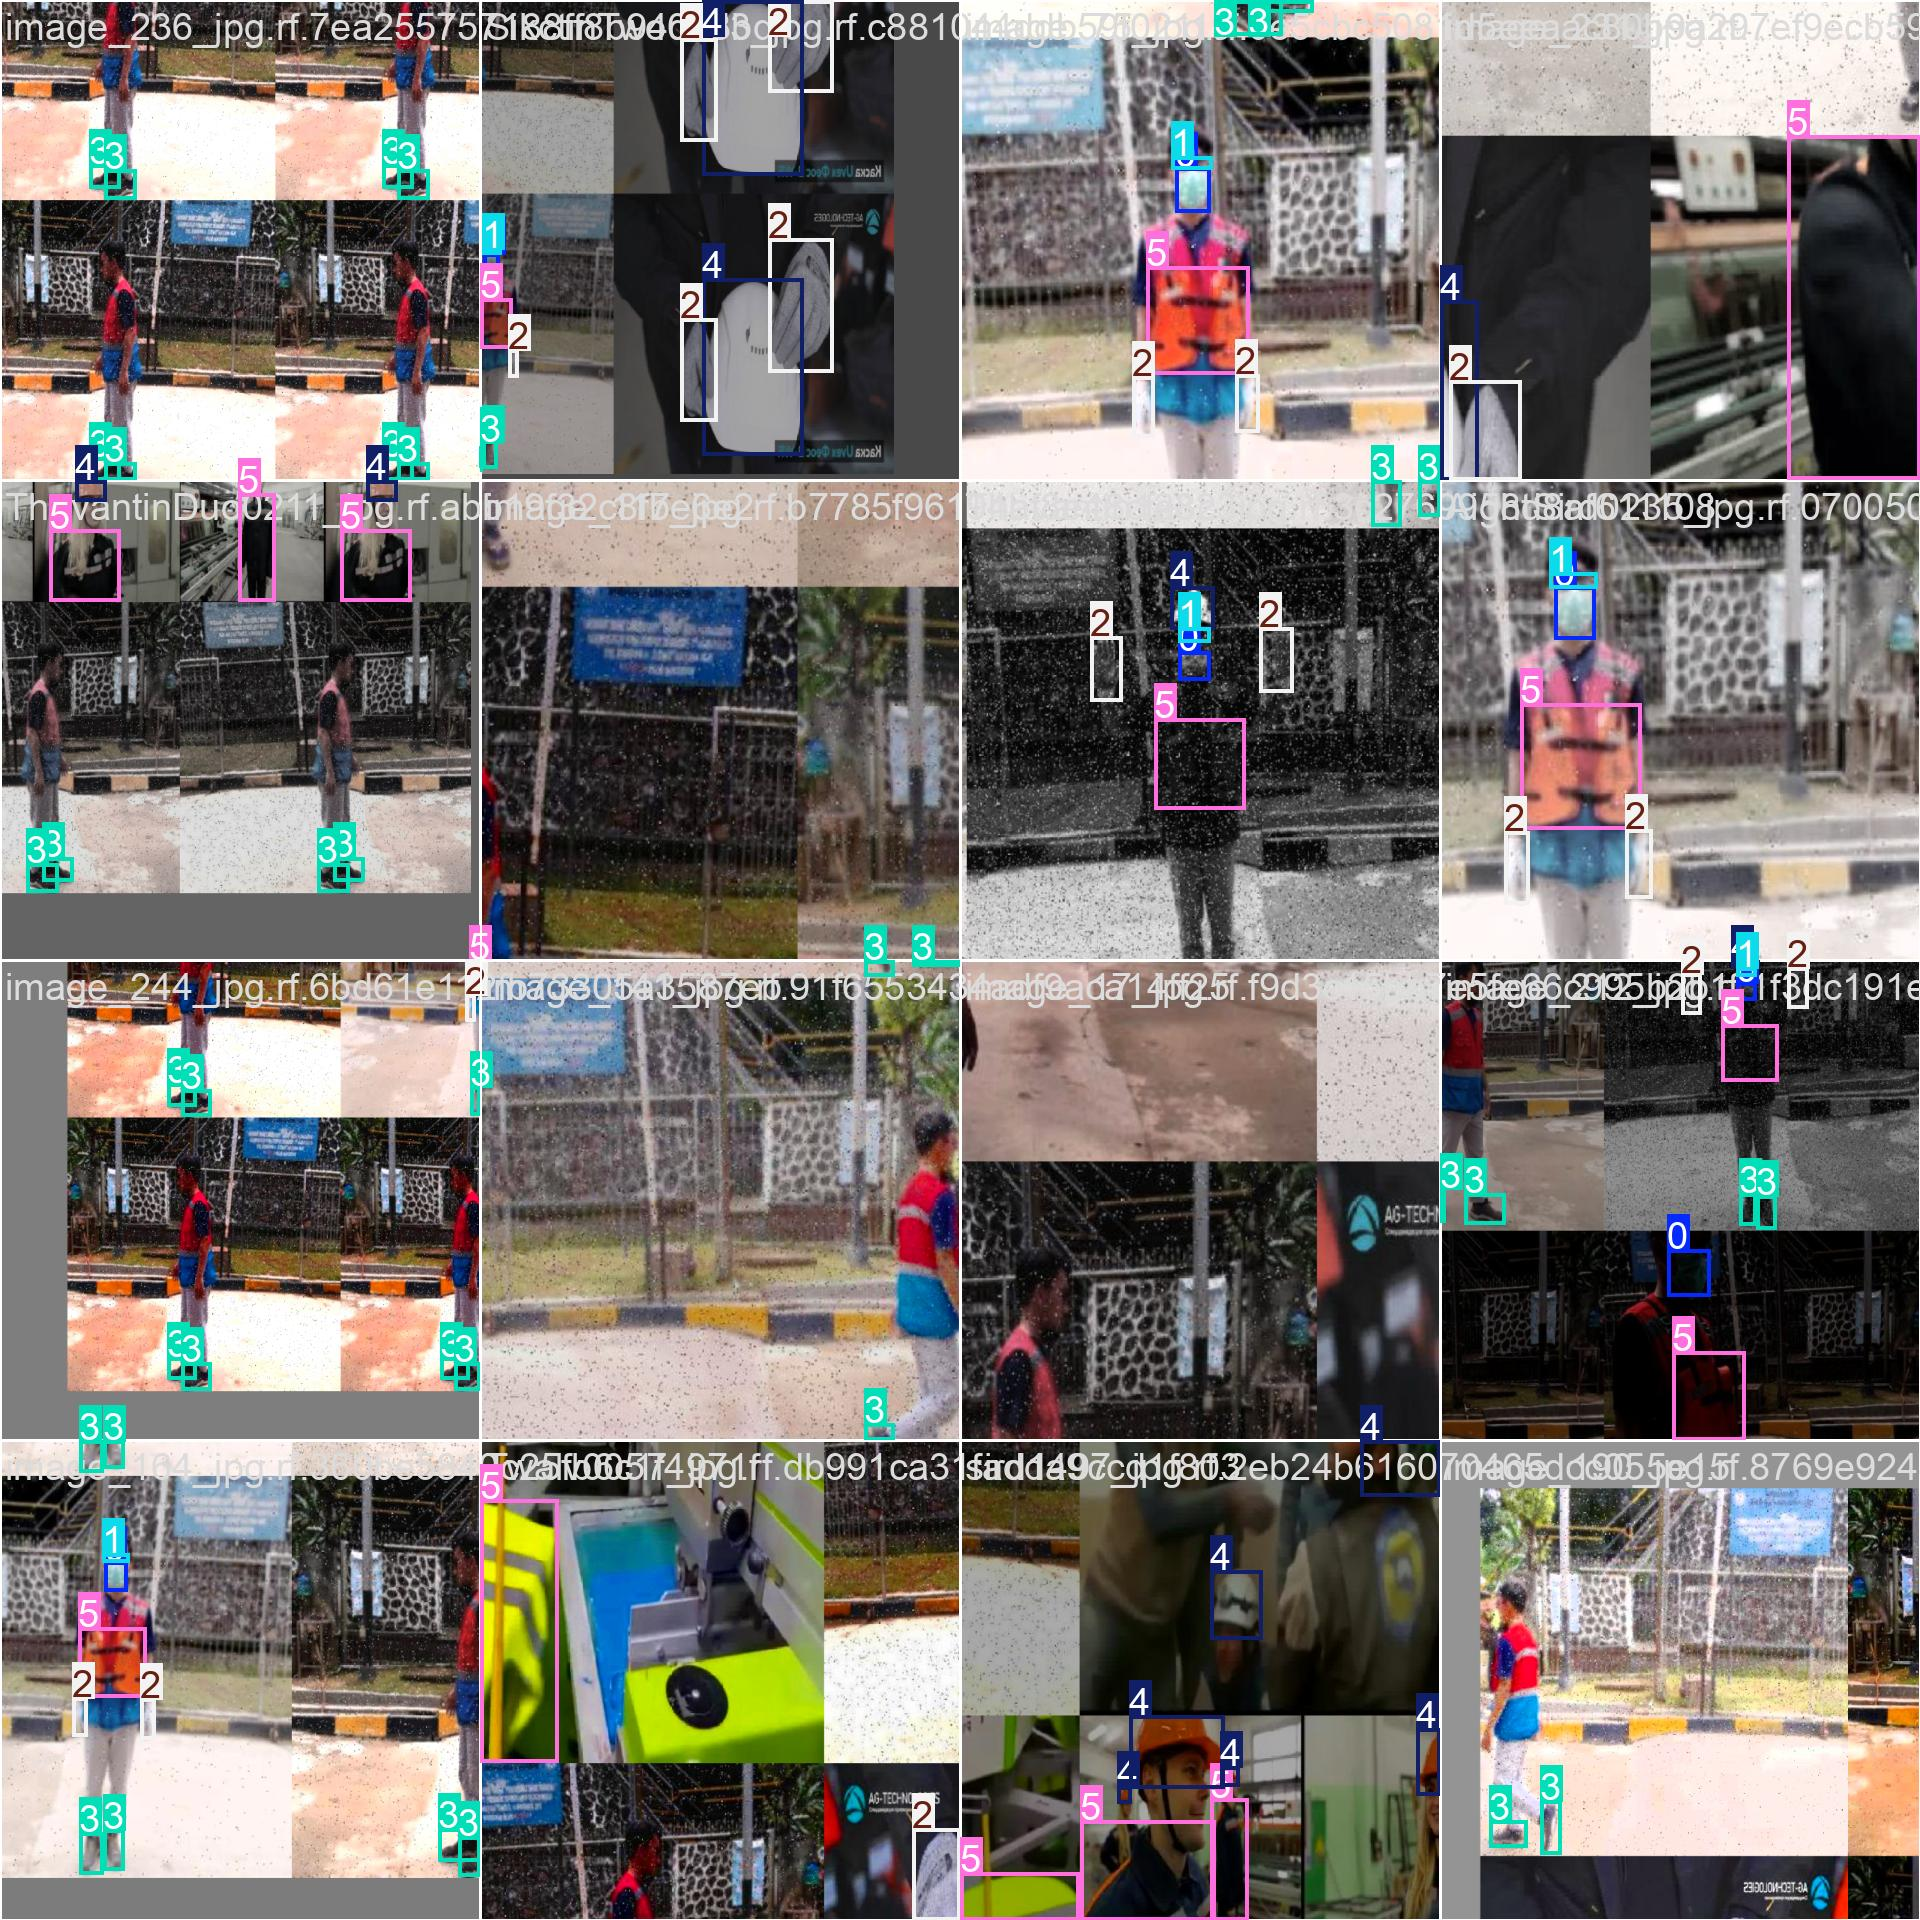

In [19]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

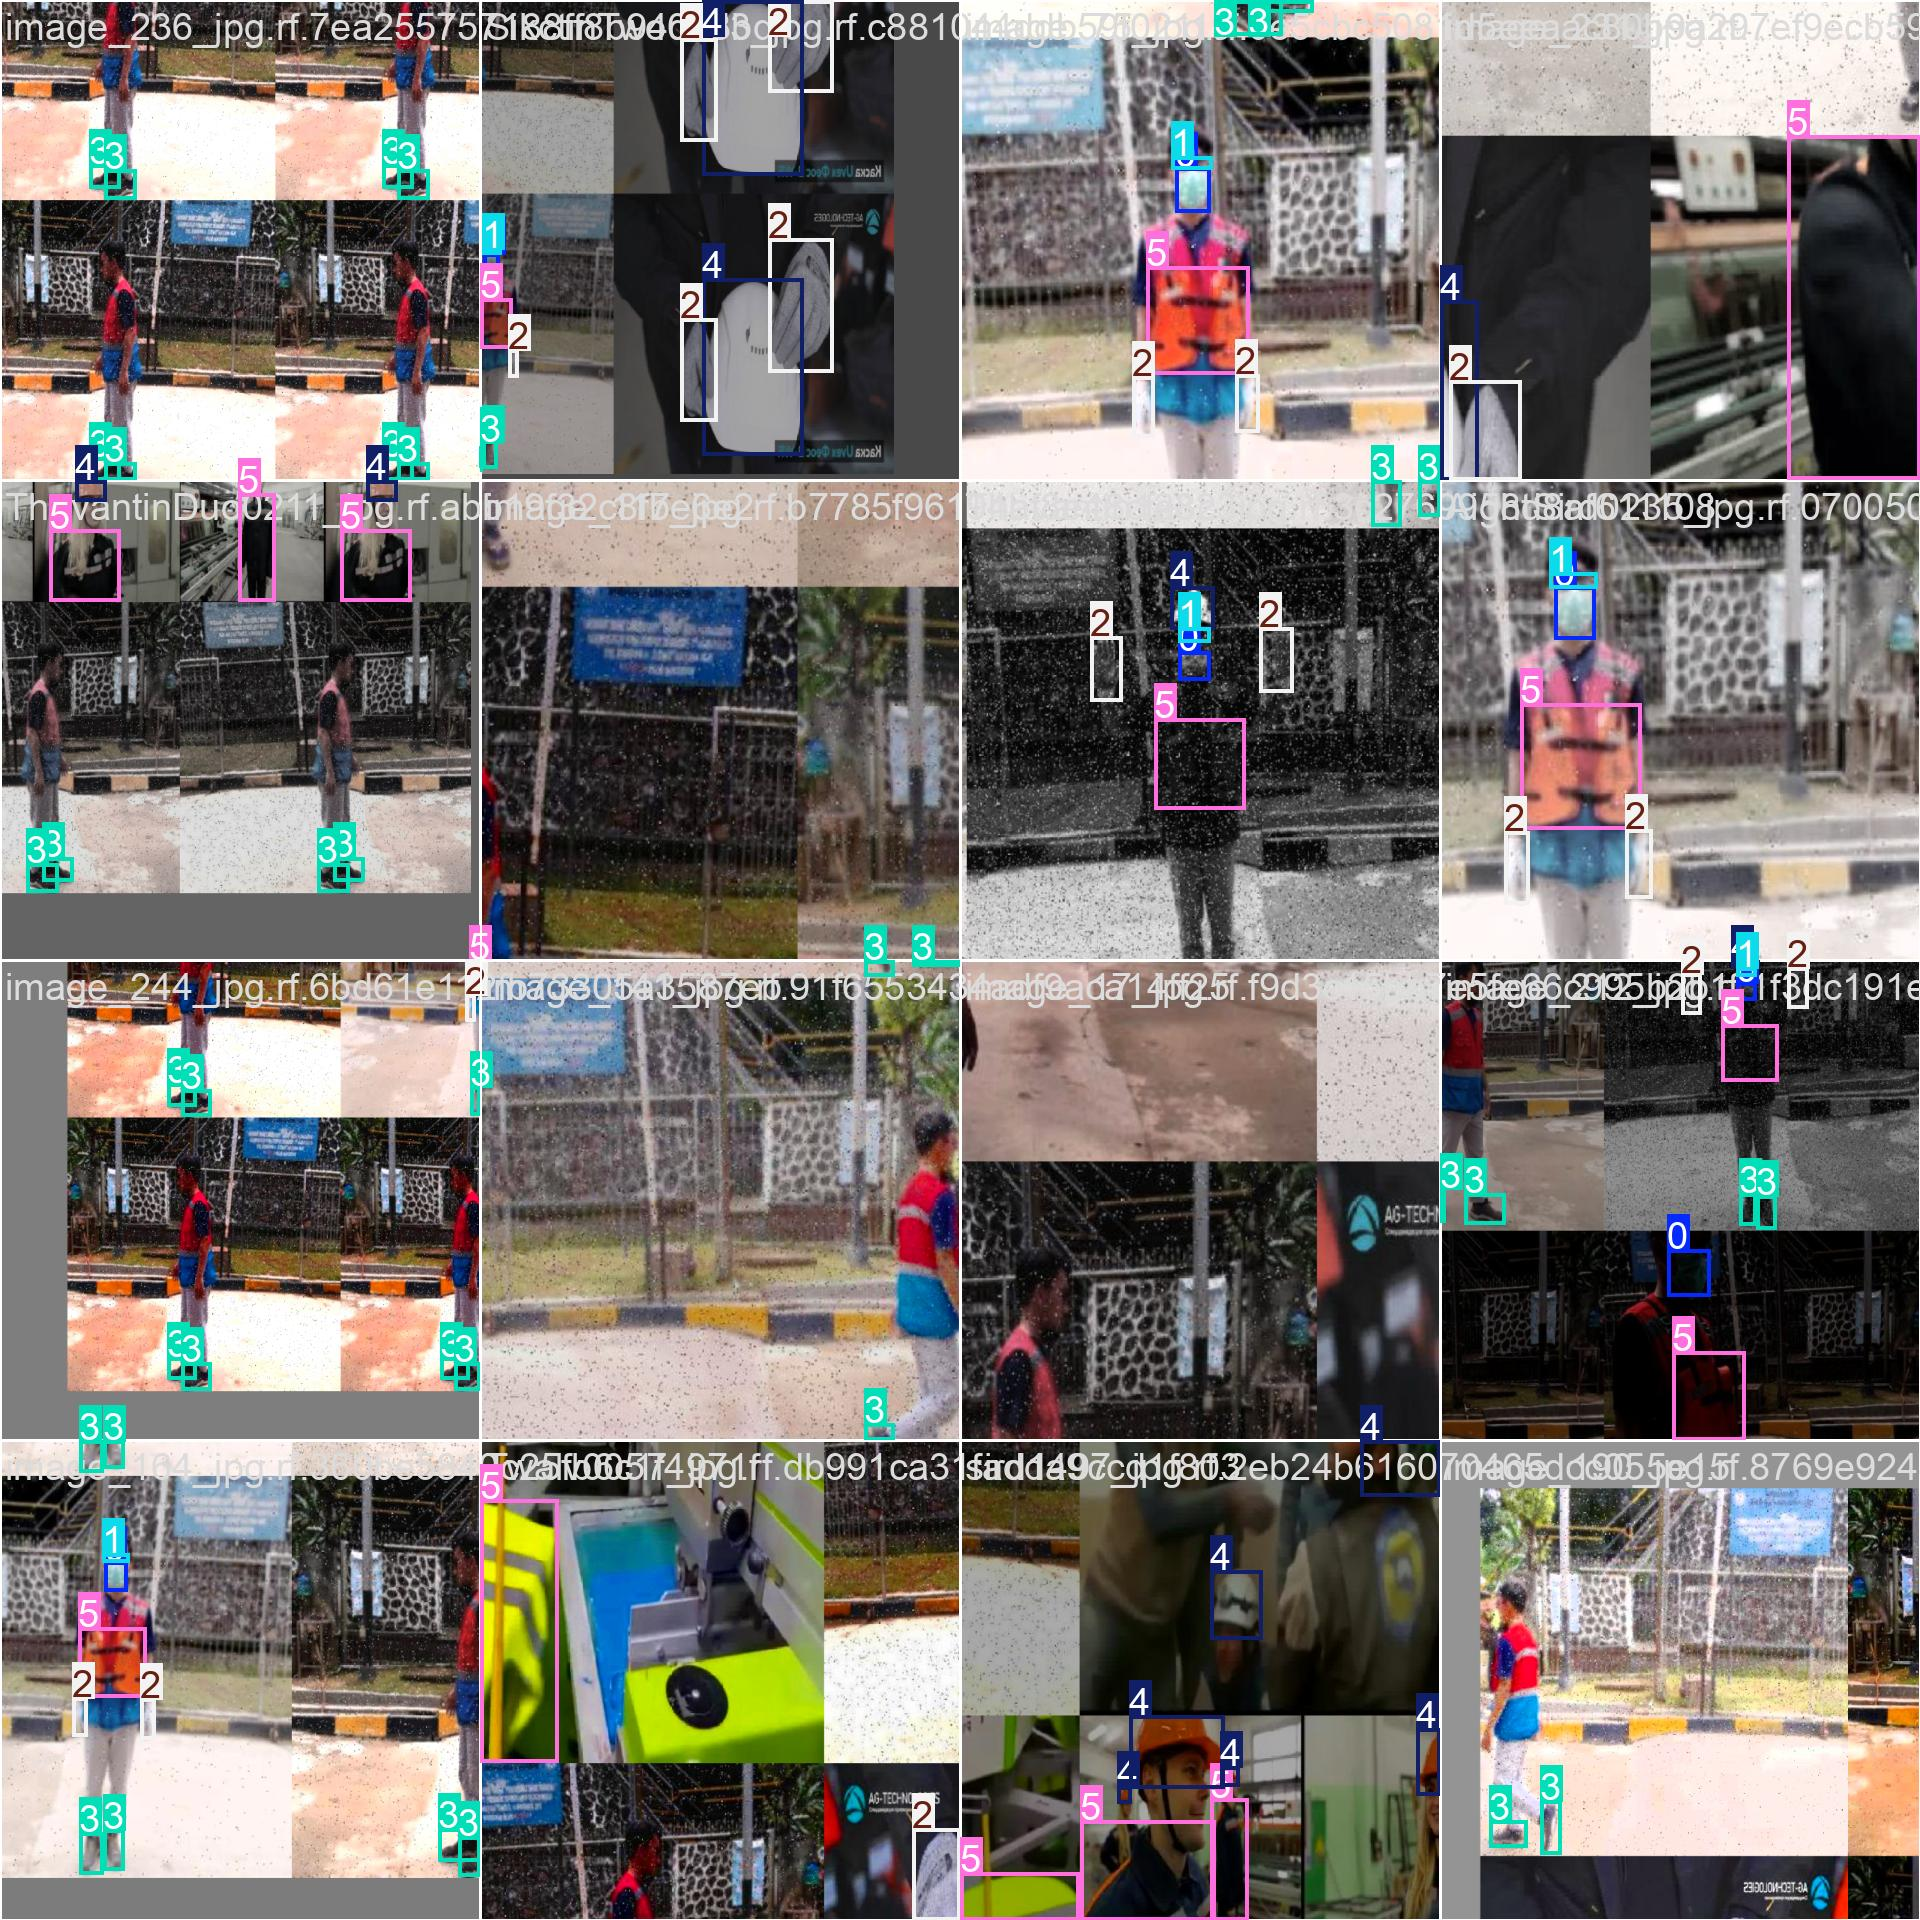

In [20]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

In [21]:
from ultralytics import YOLO

model_ppe = YOLO('/content/runs/detect/train/weights/best.pt')
model_person = YOLO('yolov8n.pt')


image 1/1 /content/PPE_Detection-2/test/images/image_90_jpg.rf.28a5c683c77fb76559e2d66f2c2095c9.jpg: 640x640 1 Dust Mask, 1 Eye Wear, 2 Gloves, 2 Protective Bootss, 1 Protective Helmet, 1 Safety Vest, 10.7ms
Speed: 3.3ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/PPE_Detection-2/test/images/image_90_jpg.rf.28a5c683c77fb76559e2d66f2c2095c9.jpg: 640x640 1 person, 1 handbag, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/PPE_Detection-2/test/images/image_90_jpg.rf.28a5c683c77fb76559e2d66f2c2095c9.jpg: 640x640 1 Dust Mask, 1 Eye Wear, 2 Gloves, 2 Protective Bootss, 1 Protective Helmet, 1 Safety Vest, 10.9ms
Speed: 2.2ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/PPE_Detection-2/test/images/image_90_jpg.rf.28a5c683c77fb76559e2d66f2c2095c9.jpg: 640x640 1 person, 1 handbag, 8.4ms
Speed: 2.6ms prepr

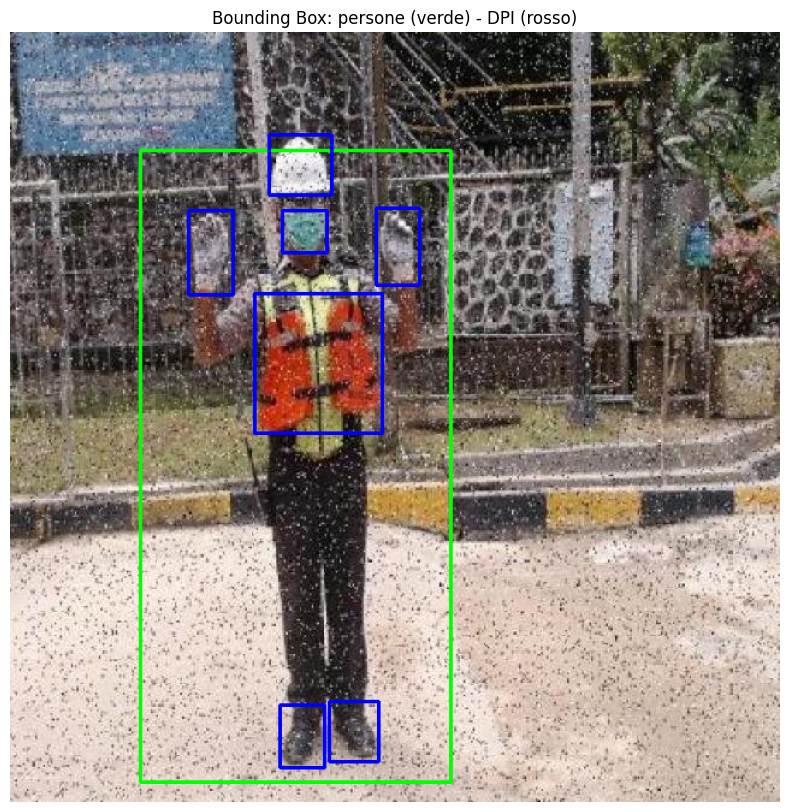

In [22]:
image_path = "/content/PPE_Detection-2/test/images/image_90_jpg.rf.28a5c683c77fb76559e2d66f2c2095c9.jpg"
results_ppe = model_ppe(image_path)
results_person = model_person(image_path)

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = "/content/PPE_Detection-2/test/images/image_90_jpg.rf.28a5c683c77fb76559e2d66f2c2095c9.jpg"

confidence_threshold_person = 0.4
confidence_threshold_ppe = 0.3

results_ppe = model_ppe(image_path)
results_person = model_person(image_path)

people_boxes = []
for r in results_person:
    for box in r.boxes:
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        if conf > confidence_threshold_person and cls == 0:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            x1 -= 50
            y1 -= 40
            x2 += 50
            y2 += 10
            people_boxes.append([x1, y1, x2, y2])

# Extract PPE
ppe_boxes_by_type = {
    'Dust Mask': [],
    'Glove': [],
    'Protective Boots': [],
    'Protective Helmet': [],
    'Safety Vest': [],
}
for r in results_ppe:
    for box in r.boxes:
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        if conf > confidence_threshold_ppe:
            label = model_ppe.names[cls]
            if label in ppe_boxes_by_type:
                coords = box.xyxy[0].tolist()
                ppe_boxes_by_type[label].append(coords)

# Visualization
img_cv = cv2.imread(image_path)
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

# People boxes
for box in people_boxes:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

# PPE boxes
for boxes in ppe_boxes_by_type.values():
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img_cv)
plt.axis('off')
plt.title("Bounding Box: persone (verde) - DPI (rosso)")
plt.show()



In [23]:
def is_inside(inner_box, outer_box):
    """
    Checks if the center of the PPE boxes are inside the person's box.
    """
    x1_i, y1_i, x2_i, y2_i = inner_box
    x1_o, y1_o, x2_o, y2_o = outer_box

    # PPE center's calculation
    cx = (x1_i + x2_i) / 2
    cy = (y1_i + y2_i) / 2

    # Check of the position
    return x1_o <= cx <= x2_o and y1_o <= cy <= y2_o


In [24]:
# Function to check if a box is inside the other
def is_inside(inner_box, outer_box):
    x1_i, y1_i, x2_i, y2_i = inner_box
    x1_o, y1_o, x2_o, y2_o = outer_box
    cx = (x1_i + x2_i) / 2
    cy = (y1_i + y2_i) / 2
    return x1_o <= cx <= x2_o and y1_o <= cy <= y2_o


In [26]:
!pip install mediapipe
import mediapipe as mp
import numpy as np

mp_pose = mp.solutions.pose

#Function to determine the visibility of a person using keypoints in mediapipe
def is_person_fully_visible(pil_img, person_box, min_keypoints_visible=10):
    x1, y1, x2, y2 = map(int, person_box)
    cropped_img = pil_img.crop((x1, y1, x2, y2)).convert("RGB")
    image_np = np.array(cropped_img)

    with mp_pose.Pose(static_image_mode=True) as pose:
        results = pose.process(image_np)
        if results.pose_landmarks:
            visible_kps = [lm for lm in results.pose_landmarks.landmark if lm.visibility > 0.5]
            return len(visible_kps) >= min_keypoints_visible
        return False

# --- Detailed person's analysis ---
if not people_boxes:
    print("\n🚫 Nessuna persona rilevata nell'immagine.")
else:
    safety_results = []

    for idx, person_box in enumerate(people_boxes):
        has_helmet = has_vest = has_glove = has_boot = has_mask = False

        # Chek to establish if the helmet is in the upper fourth of the person's bouding box
        for dpi_box in ppe_boxes_by_type['Protective Helmet']:
            if is_inside(dpi_box, person_box):
                x1, y1, x2, y2 = dpi_box
                center_y = (y1 + y2) / 2
                px1, py1, px2, py2 = person_box
                top_fourth_limit = py1 + (py2 - py1) / 4

                print(f"🔍 Casco centro Y: {center_y:.2f}, limite top 1/4 persona: {top_fourth_limit:.2f}")
                if py1 <= center_y <= top_fourth_limit:
                    has_helmet = True
                    print("✅ Casco nel quarto superiore → accettato")
                    break
                else:
                    print("❌ Casco fuori dal quarto superiore → ignorato")

        # Other PPEs
        for dpi_box in ppe_boxes_by_type['Safety Vest']:
            if is_inside(dpi_box, person_box):
                has_vest = True

        for dpi_box in ppe_boxes_by_type['Glove']:
            if is_inside(dpi_box, person_box):
                has_glove = True

        for dpi_box in ppe_boxes_by_type['Protective Boots']:
            if is_inside(dpi_box, person_box):
                has_boot = True

        for dpi_box in ppe_boxes_by_type['Dust Mask']:
            if is_inside(dpi_box, person_box):
                has_mask = True

        # ✅ Checks visibility with mediapipe
        pil_img = Image.open(image_path)
        is_fully_visible = is_person_fully_visible(pil_img, person_box)

        # Final evaluation
        is_safe = all([has_helmet, has_vest, has_glove, has_boot, has_mask, is_fully_visible])
        safety_results.append(is_safe)

        # Diagnosis
        print(f"\n🧍 Person {idx+1}:")
        print(f"  - Helmet:              {'✅' if has_helmet else '❌'}")
        print(f"  - Vest:                {'✅' if has_vest else '❌'}")
        print(f"  - Gloves:              {'✅' if has_glove else '❌'}")
        print(f"  - Boots:               {'✅' if has_boot else '❌'}")
        print(f"  - Mask:                {'✅' if has_mask else '❌'}")
        print(f"  - Entirely visible:{'✅' if is_fully_visible else '❌'}")

        if not is_fully_visible:
            print(f"\n⚠️ Person not entirely visible\n")
        elif is_safe:
            print(f"\n✅🟩 Safe person ✅\n")
        else:
            print(f"\n❌🟥 NOT safe person ❌\n")


🔍 Casco centro Y: 110.38, limite top 1/4 persona: 229.31
✅ Casco nel quarto superiore → accettato

🧍 Person 1:
  - Helmet:              ✅
  - Vest:                ✅
  - Gloves:              ✅
  - Boots:               ✅
  - Mask:                ✅
  - Entirely visible:✅

✅🟩 Safe person ✅



In [27]:
from google.colab import drive
import os
drive.mount('/content/drive')

# Set the image path
image_folder = '/content/drive/MyDrive/Project_management/Test'
image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]


Mounted at /content/drive


In [28]:
from PIL import Image


In [29]:
!pip install mediapipe
import cv2
import mediapipe as mp

mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(static_image_mode=True)

def is_person_fully_visible(image_path, person_box):
    image = cv2.imread(image_path)
    if image is None:
        return False

    x1, y1, x2, y2 = map(int, person_box)
    cropped = image[y1:y2, x1:x2]
    if cropped.size == 0:
        return False

    cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    results = pose_detector.process(cropped_rgb)

    if not results.pose_landmarks:
        return False

    keypoints = results.pose_landmarks.landmark
    required_indices = [0, 11, 12, 23, 24, 27, 28, 31, 32]  # head, shoulders, hips, knees, ankles
    visible = [kp.visibility > 0.5 for i, kp in enumerate(keypoints) if i in required_indices]

    return sum(visible) >= 7  # at least 7 out of 9 visible


In [30]:
import cv2
import os

def draw_annotated_image(image_path, person_box, ppe_boxes_by_type, output_folder="/content/annotated"):
    os.makedirs(output_folder, exist_ok=True)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # it draws only the boc of the person that's being analyzed (in green)
    x1, y1, x2, y2 = map(int, person_box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # It draws just its realtive PPEs (in red)
    for boxes in ppe_boxes_by_type.values():
        for box in boxes:
            bx1, by1, bx2, by2 = box
            if bx1 >= x1 and by1 >= y1 and bx2 <= x2 and by2 <= y2:
                cv2.rectangle(img, (int(bx1), int(by1)), (int(bx2), int(by2)), (255, 0, 0), 2)

    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(output_folder, f"{filename}_{x1}_{y1}.jpg")
    cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    return save_path


In [31]:
def analyze_image(image_path):
    image = Image.open(image_path)
    results_ppe = model_ppe(image_path)
    results_person = model_person(image_path)

    people_boxes = []
    for r in results_person:
        for box in r.boxes:
            cls_id = int(box.cls[0])
            cls_label = model_person.names[cls_id]
            conf = float(box.conf[0])
            if cls_label == 'person' and conf > confidence_threshold_person:
                x1, y1, x2, y2 = box.xyxy[0].tolist()
                x1 -= 50
                y1 -= 20
                x2 += 50
                y2 += 30
                people_boxes.append([x1, y1, x2, y2])

    filtered_classes = ['Dust Mask', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest']
    ppe_boxes_by_type = {k: [] for k in filtered_classes}

    for r in results_ppe:
        for box in r.boxes:
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            if conf > confidence_threshold_ppe:
                label = model_ppe.names[cls]
                if label in filtered_classes:
                    coords = box.xyxy[0].tolist()
                    ppe_boxes_by_type[label].append(coords)

    if not people_boxes:
        return [{
            'image_path': image_path,
            'status': '🚫 No person detected',
            'diagnosis': None
        }]

    results = []
    for person_box in people_boxes:
        details = {}
        fully_visible = is_person_fully_visible(image_path, person_box)
        details['Fully visible'] = fully_visible

        for item, tag in {
            'Protective Helmet': 'Helmet',
            'Safety Vest': 'Vest',
            'Glove': 'Gloves',
            'Protective Boots': 'Boots',
            'Dust Mask': 'Mask'
        }.items():
            found = False
            for box in ppe_boxes_by_type.get(item, []):
                if is_inside(box, person_box):
                    if item == 'Protective Helmet':
                        hx1, hy1, hx2, hy2 = box
                        h_center_y = (hy1 + hy2) / 2
                        px1, py1, px2, py2 = person_box
                        top_fourth = py1 + (py2 - py1) / 4
                        if py1 <= h_center_y <= top_fourth:
                            found = True
                            break
                    else:
                        found = True
                        break
            details[tag] = found

        # If not fully visible → warning
        if not fully_visible:
            status = '⚠️ Person not fully visible'
        else:
            is_safe = all(details.values())
            status = '✅ Safe' if is_safe else '❌ NOT safe'

        annotated_path = draw_annotated_image(image_path, person_box, ppe_boxes_by_type)

        results.append({
            'image_path': image_path,
            'annotated_path': annotated_path,
            'status': status,
            'diagnosis': details
        })

    return results


In [32]:
analisi_finale = [analyze_image(path) for path in image_paths]



image 1/1 /content/drive/MyDrive/Project_management/Test/69_jpg.rf.7edbb7113e6b26311be4d008d3aaeefe.jpg: 640x640 2 Protective Bootss, 1 Protective Helmet, 1 Safety Vest, 18.7ms
Speed: 4.0ms preprocess, 18.7ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Project_management/Test/69_jpg.rf.7edbb7113e6b26311be4d008d3aaeefe.jpg: 640x640 1 person, 8.9ms
Speed: 3.1ms preprocess, 8.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Project_management/Test/Aitin2428_jpg.rf.1fa8ecc7c5e7e428f84129db9109741b.jpg: 640x640 2 Gloves, 1 Protective Helmet, 2 Safety Vests, 9.5ms
Speed: 2.6ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Project_management/Test/Aitin2428_jpg.rf.1fa8ecc7c5e7e428f84129db9109741b.jpg: 640x640 1 person, 1 handbag, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1

In [34]:
import base64

def encode_image(image_path):
    with open(image_path, 'rb') as img_file:
        return base64.b64encode(img_file.read()).decode()

html = """
<html>
<head>
  <style>
    table {border-collapse: collapse; width: 100%;}
    th, td {border: 1px solid black; padding: 10px; text-align: center;}
    img {max-width: 200px; max-height: 200px;}
    .green { color: green; font-weight: bold; }
    .red { color: crimson; font-weight: bold; }
    .yellow { color: orange; font-weight: bold; }
  </style>
</head>
<body>
<h2>🧾 Report Analisi Sicurezza</h2>
<table>
<tr>
  <th>Foto</th>
  <th>Dettagli DPI</th>
  <th>Stato</th>
</tr>
"""

for result_list in analisi_finale:
    for r in result_list:
        image_key = r.get("annotated_path", r.get("image_path", ""))
        try:
            img_html = f'<img src="data:image/jpeg;base64,{encode_image(image_key)}"/>'
        except Exception:
            img_html = "<i>⚠️ Error loading the image</i>"

        if r['diagnosis']:
            diagnosis = r['diagnosis']
            dettagli = "".join([f"<li>{k}: {'✅' if v else '❌'}</li>" for k, v in diagnosis.items()])
            stato = r['status']

            if "⚠️" in stato:
                stato = "<span class='yellow'>⚠️ Person not fully visible</span>"
            elif "✅" in stato:
                stato = "<span class='green'>✅ Safe</span>"
            else:
                stato = "<span class='red'>❌ NOT safe</span>"

        else:
            dettagli = "<li>Nessuna persona</li>"
            stato = "<span class='red'>🚫 No person spotted</span>"

        html += f"""
        <tr>
          <td>{img_html}</td>
          <td><ul>{dettagli}</ul></td>
          <td><b>{stato}</b></td>
        </tr>
        """

html += "</table></body></html>"

output_path = "/content/drive/MyDrive/Project_management/report_safety_03062025.html"
with open(output_path, "w") as f:
    f.write(html)

print(f"✅ Report generated: {output_path}")


✅ Report generated: /content/drive/MyDrive/Project_management/report_safety_03062025.html


In [ ]:
pip install gradio ultralytics mediapipe opencv-python pillow
